<a href="https://colab.research.google.com/github/katiabara/application/blob/main/PROJET_AARN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projet de fin de semestre

# Introduction


Pour ce projet, l’objectif est d’utiliser les notions apprises durant ce semestre pour résoudre un problème de sciences de données. Les étudiants en binôme devront implémenter un classifieur de tweet dans le contexte de l’analyse des sentiments.


# Étape 1 : préparation des données

 Cela implique le nettoyage et la transformation des tweets pour les rendre adaptés à l'analyse de sentiment. Voici les sous-étapes :

Nettoyage des tweets : Convertir le texte en minuscules, supprimer les balises HTML, réduire les mots à leur forme radicale, supprimer la ponctuation et les non-mots, et enlever les mots vides.

Construction du vocabulaire : Créer une liste de mots à partir des tweets prétraités et conserver uniquement les mots qui apparaissent au moins un certain nombre de fois dans le corpus de tweets (K fois). Enregistrer cette liste dans un fichier.

Extraction des caractéristiques : Convertir chaque tweet en un vecteur de caractéristiques, en utilisant soit une représentation binaire (0 ou 1 selon la présence d'un mot), soit une représentation par comptage (nombre d'apparitions de chaque mot).

Ces étapes préliminaires permettent de préparer les données de manière à ce qu'elles puissent être utilisées pour entraîner un modèle d'analyse de sentiment.

In [ ]:
# Import des bibliothèques nécessaires
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re
import pandas as pd
import numpy as np


# Téléchargement des ressources nécessaires de NLTK
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Nous commençons par importer les bibliothèques nécessaires pour effectuer le nettoyage des tweets.
nltk (Natural Language Toolkit) est utilisé pour le traitement naturel du langage, qui fournit des outils pour le prétraitement du texte.
re est la bibliothèque Python pour les expressions régulières, qui est utilisée pour la manipulation de chaînes de caractères.

Nous utilisons la fonction download de NLTK pour télécharger les ressources nécessaires, telles que la liste des mots vides (stopwords) et le tokenizer de tweets.

In [ ]:
# Charger le fichier CSV
df = pd.read_csv("/content/drive/MyDrive/Projet TP AARN/training.1600000.processed.noemoticon.csv", encoding='ISO-8859-1', header=None)


In [ ]:
# Renommer les colonnes
df.columns = ["target", "ids", "date", "flag", "user", "text"]

Le fichier CSV contenant les données des tweets est chargé dans un DataFrame Pandas. Les colonnes du DataFrame sont nommées en fonction des informations contenues dans le fichier.

In [ ]:
# Supprimer les colonnes inutiles
df.drop(["ids", "date", "flag", "user"], axis=1, inplace=True)

Les colonnes inutiles comme l'ID, la date, le flag et le nom d'utilisateur sont supprimées car elles ne sont pas nécessaires pour notre analyse.

In [ ]:
import re
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def clean_tweet(tweet):
    # Convertir en minuscules
    tweet = tweet.lower()

    # Supprimer les balises HTML
    tweet = re.sub(r'<[^>]+>', '', tweet)
    tweet = re.sub(r'[?/.,<>!@#$%^&*()_\-+={}[\]|":;]', '', tweet)
    # Remplacer tous les non-mots, ponctuations, chiffres, et caractères spéciaux par un espace
    tweet = re.sub(r'[^a-zA-Z\s]', ' ', tweet)

    # Supprimer les mots vides (stopwords)
    stop_words = set(stopwords.words('english'))

    # Tokenization du tweet
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(tweet)

    # Supprimer les mots vides (stopwords) et les mots de longueur 1
    tokens = [token for token in tokens if token.lower() not in stop_words and len(token) > 1]

    # Réduction des mots à leur forme radicale
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(token) for token in tokens]

    # Réassembler les tokens
    cleaned_tweet = ' '.join(tokens)

    return cleaned_tweet


Une fonction est définie pour nettoyer chaque tweet. Cette fonction effectue plusieurs étapes de nettoyage, telles que la conversion en minuscules, la suppression des balises HTML, la tokenization, la suppression des mots vides, la réduction des mots à leur forme radicale, et la réassemblage des tokens nettoyés en une seule chaîne de caractères.

In [ ]:
# Appliquer la fonction de nettoyage à tous les tweets
df['cleaned_text'] = df['text'].apply(clean_tweet)
df.to_csv('dataset.csv', index=False)

La fonction de nettoyage est appliquée à chaque tweet dans la colonne "text" du DataFrame, et les tweets nettoyés sont stockés dans une nouvelle colonne appelée "cleaned_text".

In [ ]:
df

,target,text,cleaned_text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot httptwitpiccom zl awww bummer shoul...
1,0,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see
...,...,...,...
1599995,4,Just woke up. Having no school is the best fee...,woke school best feel ever
1599996,4,TheWDB.com - Very cool to hear old Walt interv...,thewdbcom cool hear old walt interview httpbli...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...,readi mojo makeov ask detail
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...,happi th birthday boo alll time tupac amaru sh...


Les  tweets, ainsi que leur version nettoyée, sont affichés pour vérification.

In [ ]:
from collections import defaultdict

# Initialiser un dictionnaire pour stocker les occurrences de chaque mot
word_counts = defaultdict(int)

# Parcourir chaque tweet nettoyé
for cleaned_tweet in df['cleaned_text']:
    # Diviser le tweet nettoyé en mots individuels
    words = cleaned_tweet.split()
    # Mettre à jour le dictionnaire des occurrences de mots
    for word in words:
        word_counts[word] += 1

# Trier le dictionnaire par valeur pour obtenir les mots les plus fréquents
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Afficher les 10 mots les plus fréquents
print("Les 10 mots les plus fréquents :")
for word, count in sorted_word_counts[:10]:
    print(f"{word}: {count}")


Les 10 mots les plus fréquents :
go: 137241
get: 110125
day: 104542
good: 90657
work: 85351
like: 83014
love: 81226
today: 66142
time: 64425
got: 61288


Ce code parcourt chaque tweet nettoyé, divise chaque tweet en mots individuels, met à jour le dictionnaire word_counts pour compter le nombre d'occurrences de chaque mot, puis trie le dictionnaire par valeur pour obtenir les mots les plus fréquents. Enfin, il affiche les 10 mots les plus fréquents avec leur nombre d'occurrences.

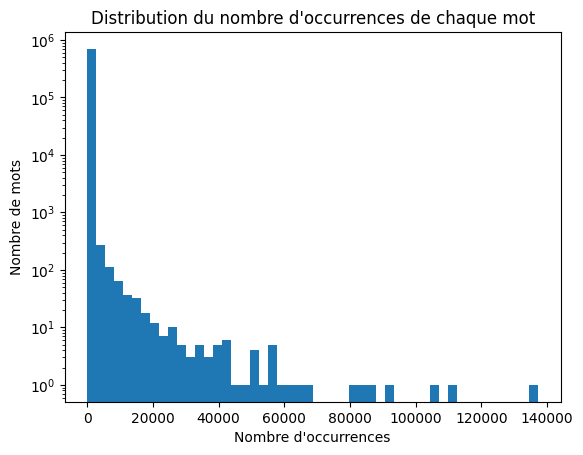

In [ ]:
import matplotlib.pyplot as plt

# Extraire le nombre d'occurrences de chaque mot
word_counts_values = list(word_counts.values())

# Tracer un histogramme pour visualiser la distribution
plt.hist(word_counts_values, bins=50, log=True)
plt.xlabel('Nombre d\'occurrences')
plt.ylabel('Nombre de mots')
plt.title('Distribution du nombre d\'occurrences de chaque mot')
plt.show()


un histogramme montrant la distribution du nombre d'occurrences de mots dans le corpus de tweets.
nous avons visualisé la distribution du nombre d'occurrences de chaque mot et que nous avons une idée claire de la répartition, on vas choisir un seuil K qui vous semble approprié en fonction de vos besoins spécifiques et de la taille de votre corpus de tweets.Ce seuil K déterminera le nombre minimum d'occurrences requis pour qu'un mot soit inclus dans votre vocabulaire.

In [ ]:
# Choix empirique du seuil K en fonction de la distribution
seuil_K = 10000  # Modifier ce seuil en fonction de la distribution observée

En fonction de la distribution observée dans l'histogramme, un seuil K est choisi de manière empirique. Ce seuil détermine le nombre minimum d'occurrences requis pour qu'un mot soit inclus dans le vocabulaire. Le seuil initial est fixé à 2000, mais il peut être modifié en fonction des besoins spécifiques.

In [ ]:
# Comptage des occurrences de chaque mot dans le corpus de tweets
occurrences = {}
for tweet in df['cleaned_text']:
    mots = tweet.split()
    for mot in mots:
        occurrences[mot] = occurrences.get(mot, 0) + 1


In [ ]:
# Filtrage des mots avec un nombre d'occurrences supérieur ou égal à K pour construire le vocabulaire
vocabulaire = [mot for mot, occ in occurrences.items() if occ >= seuil_K]

Les mots ayant un nombre d'occurrences supérieur ou égal au seuil K sont conservés pour construire le vocabulaire. Ces mots sont stockés dans une liste appelée vocabulaire.

In [ ]:
# Sauvegarde du vocabulaire dans un fichier texte avec l'encodage UTF-8
with open('vocab.txt', 'w', encoding='utf-8') as f:
    for mot in vocabulaire:
        f.write(mot + ' ')


Le vocabulaire est sauvegardé dans un fichier texte nommé vocab.txt.

In [ ]:
with open('vocab.txt', 'r') as file:
    vocab = file.read().split(" ")

print(vocab)
print(len(vocab))

['httptwitpiccom', 'got', 'day', 'school', 'today', 'also', 'time', 'go', 'feel', 'like', 'see', 'need', 'hey', 'long', 'ye', 'rain', 'bit', 'lol', 'thank', 'watch', 'thought', 'never', 'talk', 'would', 'first', 'realli', 'though', 'wish', 'miss', 'hurt', 'alway', 'want', 'love', 'oh', 'get', 'much', 'done', 'one', 'friend', 'call', 'week', 'hope', 'tomorrow', 'hate', 'peopl', 'sleep', 'im', 'sad', 'ok', 'make', 'new', 'morn', 'work', 'night', 'sick', 'hour', 'back', 'bed', 'tell', 'ya', 'later', 'good', 'sorri', 'think', 'even', 'know', 'anoth', 'gonna', 'wanna', 'still', 'final', 'girl', 'yay', 'happi', 'mean', 'check', 'look', 'happen', 'wait', 'wow', 'tweet', 'lot', 'take', 'sure', 'dont', 'away', 'show', 'say', 'use', 'game', 'alreadi', 'glad', 'hear', 'well', 'play', 'leav', 'life', 'cool', 'nice', 'bad', 'come', 'lost', 'phone', 'soon', 'haha', 'someon', 'right', 'start', 'tonight', 'ur', 'damn', 'stop', 'pleas', 'babi', 'birthday', 'parti', 'enjoy', 'thing', 'find', 'littl', 'a

In [ ]:
# Mapping de chaque mot dans le tweet prétraité à son index dans le vocabulaire
index_mots = []
for tweet in df['cleaned_text']:
    indices_tweet = []
    mots_tweet = tweet.split()
    for mot in mots_tweet:
        if mot in vocabulaire:
            indices_tweet.append(vocabulaire.index(mot))
    index_mots.append(indices_tweet)

Chaque mot dans chaque tweet nettoyé est remplacé par son index correspondant dans le vocabulaire. Les indices sont stockés dans une liste nommée index_mots.

In [ ]:
# Affichage des index de mots pour les premiers tweets
for i in range(5):
    print(f"Index des mots pour le tweet {i+1} : {index_mots[i]}")


Index des mots pour le tweet 1 : [0, 1, 2]
Index des mots pour le tweet 2 : [3, 4, 5]
Index des mots pour le tweet 3 : [6, 7]
Index des mots pour le tweet 4 : [8, 9]
Index des mots pour le tweet 5 : [10]


Les index de mots pour les cents premiers tweets sont affichés à des fins de vérification.

In [ ]:
# Création du vecteur de vocabulaire
with open('vocab.txt', 'r') as file:
    vocabulaire = file.read().split(" ")

# Représentation binaire des caractéristiques
vecteurs_binaires = []
for tweet in df['cleaned_text']:
    vecteur_caracteristiques = [1 if mot in tweet else 0 for mot in vocabulaire]
    vecteurs_binaires.append(vecteur_caracteristiques)


In [ ]:
# Affichage de la représentation binaire des caractéristiques pour les 10 premiers tweets
print("Représentation binaire des caractéristiques pour les 10 premiers tweets :")
for i, vecteur in enumerate(vecteurs_binaires[:10]):
    print(f"Tweet {i+1}: {vecteur}")


Représentation binaire des caractéristiques pour les 10 premiers tweets :
Tweet 1: [1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1]
Tweet 2: [0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

# Étape 2 : Classification

Une fois les vecteurs caractéristiques obtenus ; il est possible d’utiliser tous les classifieurs appris durant ce semestre :

•	Une comparaison des classifieurs devra être faite et les résultats discutés.

•	Une modularité du code est exigée.

•	L’utilisation des implémentations existantes (librairies) d’algorithmes de classification est permise, toutefois il est important de justifier le choix des libraires ainsi que des paramètres.

•	L’utilisation d’algorithmes d’apprentissage profond pour cette tâche est grandement appréciée et une comparaison entre les approches classiques et celles de l’apprentissage profond est encouragée

In [ ]:
# Nom du fichier où vous voulez stocker les vecteurs binaires au format texte
nom_fichier_txt = 'vecteurs_binaires.txt'

# Ouvrir le fichier en mode écriture
with open(nom_fichier_txt, 'w') as file:
    # Parcourir chaque vecteur binaire et l'écrire dans le fichier
    for vecteur in vecteurs_binaires:
        # Convertir le vecteur binaire en une chaîne de caractères séparée par des espaces
        ligne = ' '.join(map(str, vecteur))
        # Écrire la ligne dans le fichier
        file.write(ligne + '\n')

print("Les vecteurs binaires ont été stockés dans le fichier", nom_fichier_txt)


Les vecteurs binaires ont été stockés dans le fichier vecteurs_binaires.txt


In [ ]:
# Nom du fichier à charger
nom_fichier_txt = 'vecteurs_binaires.txt'

# Ouvrir le fichier en mode lecture
with open(nom_fichier_txt, 'r') as file:
    # Lire tout le contenu du fichier
    contenu_fichier = file.read()

# Afficher le contenu du fichier
print("Contenu du fichier chargé :\n", contenu_fichier)


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Import des bibliothèques nécessaires
from sklearn.linear_model import LogisticRegression  # Import du modèle de régression logistique
from sklearn.model_selection import train_test_split  # Import de la fonction pour diviser les données en ensembles d'entraînement et de test
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Import des métriques d'évaluation

# Conversion des vecteurs binaires en un tableau numpy en spécifiant le type de données uint8
X = np.array(vecteurs_binaires, dtype=np.uint8)

# Conversion de la cible en un tableau numpy en spécifiant le type de données uint8
Y = np.array(df['target'], dtype=np.uint8)

# Reshape de Y pour qu'il ait la même longueur que X
Y = Y.reshape(len(X),)

# Affichage des dimensions de X et Y
print("X shape: ", X.shape, " Y shape: ", Y.shape)

# Division des données en ensembles d'entraînement et de test avec une taille de test de 33% et une seed pour la reproductibilité
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)


X shape:  (1600000, 187)  Y shape:  (1600000,)


ce code convertit les vecteurs binaires représentant les caractéristiques des tweets et les cibles en tableaux numpy, puis divise les données en ensembles d'entraînement et de test en utilisant la fonction train_test_split pour évaluer la performance du modèle.


# **Random forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import de la classe RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, recall_score
# Création d'une instance de RandomForestClassifier avec les paramètres par défaut
random_forest_model = RandomForestClassifier()

# Entraînement du modèle sur les données d'entraînement
random_forest_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = random_forest_model.predict(X_test)

# Évaluation de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcul du rappel (recall)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calcul du F1-score
f1score = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1score)


Accuracy: 0.682407196969697
Recall: 0.6823220472041289
F1-score: 0.6820207437154029


# **Regression** **logistique**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, f1_score


# Initialiser et entraîner le modèle de régression logistique
logistic_regression_model = LogisticRegression(max_iter=1000)
logistic_regression_model.fit(X_train, y_train)

# Prédire les classes pour les données de test
y_pred = logistic_regression_model.predict(X_test)

# Calculer l'exactitude du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcul du rappel (recall)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calcul du F1-score
f1score = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1score)


Accuracy: 0.6902367424242424
Recall: 0.6901102296202131
F1-score: 0.689430089617918


# **K-NN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier  # Import du classifieur KNN
from sklearn.metrics import accuracy_score, recall_score, f1_score  # Import des métriques d'évaluation

# Initialisation du classifieur KNN avec un nombre de voisins (k) choisi
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entraînement du modèle sur les données d'entraînement
knn_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_knn = knn_model.predict(X_test)

# Évaluation du modèle
accuracy_knn = accuracy_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn, average='macro')
f1score_knn = f1_score(y_test, y_pred_knn, average='macro')

# Affichage des résultats
print("KNN Accuracy:", accuracy_knn)
print("KNN Recall:", recall_knn)
print("KNN F1-score:", f1score_knn)


KeyboardInterrupt: 

# **SVM**

In [ ]:
from sklearn.svm import SVC  # Import de la classe SVC pour le SVM
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score

clf = SVC(kernel='linear')  # Linear kernel
clf.fit(X_train, y_train)
# Make predictions on the test data
y_pred_svm = clf.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred_svm)
print("Accuracy:", accuracy)

print("\n"+classification_report(y_test, y_pred_svm))


# **Arbre de decision**

In [ ]:
from sklearn.tree import DecisionTreeClassifier  # Import de la classe DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , recall_score, f1_score

# Création d'une instance de DecisionTreeClassifier avec les paramètres par défaut
decision_tree_model = DecisionTreeClassifier()

# Entraînement du modèle sur les données d'entraînement
decision_tree_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred = decision_tree_model.predict(X_test)

# Évaluation de la précision
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcul du rappel (recall)
recall = recall_score(y_test, y_pred, average='macro')
print("Recall:", recall)

# Calcul du F1-score
f1score = f1_score(y_test, y_pred, average='macro')
print("F1-score:", f1score)


Accuracy: 0.6440151515151515
Recall: 0.6439786009173862
F1-score: 0.6439255008039614


# **RNN**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score

# Initialisation du modèle de réseau de neurones
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000)

# Entraînement du modèle
mlp_classifier.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions_test_mlp = mlp_classifier.predict(X_test)

# Calcul de la précision pour l'ensemble de test
accuracy_test_mlp = accuracy_score(y_test, predictions_test_mlp)
recall_test_mlp = recall_score(y_test, predictions_test_mlp)
f1score_test_mlp = f1_score(y_test, predictions_test_mlp)

# Affichage des métriques
print("Précision sur l'ensemble de test :", accuracy_test_mlp)
print("Recall sur l'ensemble de test :", recall_test_mlp)
print("F1-score sur l'ensemble de test :", f1score_test_mlp)


In [ ]:
# Data for the algorithms
algorithms = ['Random_Forest', 'Decision_Tree', 'SVM', 'Log_Reg', 'KNN','RNN']
accuracy = [accuracy_score(y_test, y_pred_rfc),accuracy_score(y_test, y_pred_dt),accuracy_score(y_test, y_pred_svm),
            accuracy_score(y_test, y_pred_lr),accuracy_score(y_test, y_pred_knn),accuracy_score(y_test, y_pred_xgb),
            accuracy_score(y_test, y_pred_nb)]

recall = [recall_score(y_test, y_pred_rfc),recall_score(y_test, y_pred_dt),recall_score(y_test, y_pred_svm),
            recall_score(y_test, y_pred_lr),recall_score(y_test, y_pred_knn),recall_score(y_test, y_pred_xgb),
            recall_score(y_test, y_pred_nb)]

f1_scores = [f1_score(y_test, y_pred_rfc),f1_score(y_test, y_pred_dt),f1_score(y_test, y_pred_svm),
            f1_score(y_test, y_pred_lr),f1_score(y_test, y_pred_knn),f1_score(y_test, y_pred_xgb),
            f1_score(y_test, y_pred_nb)]

# Set the width of each bar
bar_width = 0.25

# Set the positions of the bars on the x-axis
r1 = range(len(algorithms))
r2 = [x + bar_width for x in r1]
r3 = [x + 2*bar_width for x in r1]

plt.figure(figsize=(20,8))

# Create the bar chart
plt.bar(r1, accuracy, color='mediumspringgreen', width=bar_width, label='accuracy')
plt.bar(r2, recall, color='cornflowerblue', width=bar_width, label='Recall')
plt.bar(r3, f1_scores, color='indianred', width=bar_width, label='F1-score')

# Set the x-axis labels and title
plt.xlabel('Algorithms', fontsize=18)
plt.ylabel('Score', fontsize=18)
plt.title('Comparison of Algorithms - Accuracy, Recall, and F1-score', fontsize=18)

# Set the x-axis tick positions and labels
plt.xticks([r + bar_width for r in range(len(algorithms))], algorithms)

# Add a legend
plt.legend()


# Show the bar chart
plt.show()